# Chapter2. Machine Learning (1)
Linear regression + Optimization(gradient descent)

Correlation

# Optimization + Linear regression
> Linear regression using optimization(Gradient Descent)  
1) Generate random data of y = 0.1x + 0.3 + N(0, 0.3)   
2) Set y=Wx+b  
3) Find optimal W, b using gradient descent optimization  



In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt

x shape is:  (100, 1)
y shape is:  (100, 1)


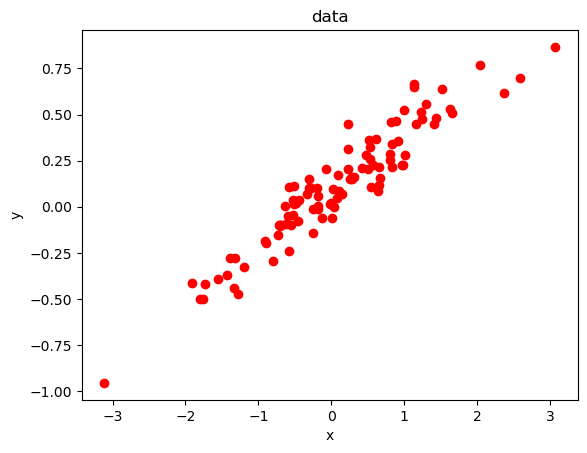

In [2]:
N = 100
theta0 = 0.1
theta1 = 0.3

x = np.random.normal(0.0, 1, N).reshape(-1, 1)
y = theta0 + theta1 * x
y = y + np.random.normal(0.0, 0.1, N).reshape(-1, 1)

print('x shape is: ', x.shape)
print('y shape is: ', y.shape)

plt.figure()
plt.plot(x, y, 'ro')
plt.title('data')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solve using Linear Algebra

In [3]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)
theta = np.array((A.T * A).I * A.T * y)

print(A.shape)
print(theta)

(100, 2)
[[0.08612609]
 [0.29356732]]


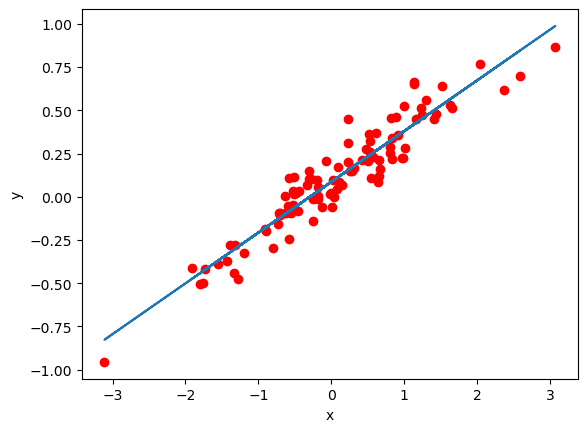

In [4]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solve using Gradient Descent with Linear Algebra

In [5]:
import numpy as np

# Initialize theta
theta = np.random.randn(2, 1)
theta = np.asmatrix(theta)

# Learning rate
alpha = 0.00001
n_iter = 3000
theta_history = []

# Gradient descent
for _ in range(n_iter):
    df = 2 * (A.T * A * theta - A.T * y)
    theta = theta - alpha * df
    theta_history.append(np.array(theta)[:,0])

print(theta)

[[0.08878696]
 [0.29614972]]


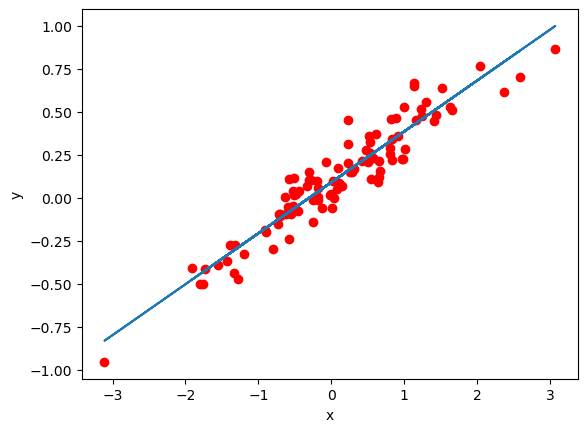

In [6]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

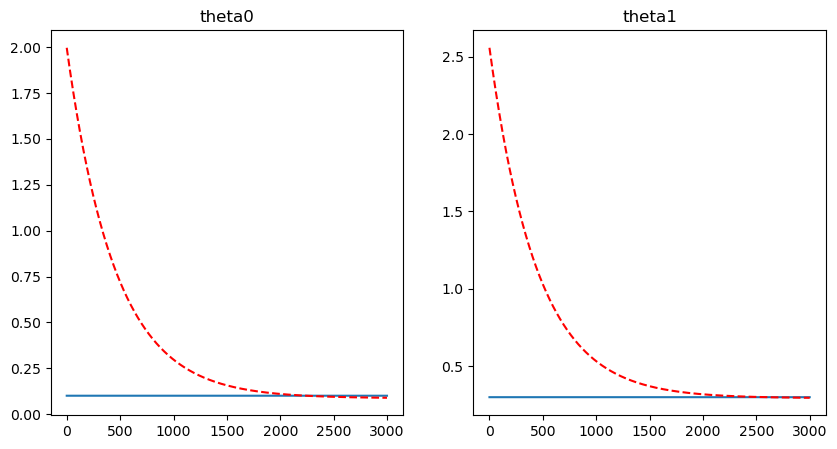

In [7]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Solve using Gradient Descent with Pytorch

### Tensor Basics

In [8]:
import torch
# Enable autograd by using tensor
tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)
print(tensor)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [9]:
# detach(): Returns a new Tensor, detached from the current graph (disabling autograd)
detached_tensor = tensor.detach()
print(detached_tensor)

tensor([[1., 2.],
        [3., 4.]])


In [10]:
# item(): Returns the value of this tensor as a standard Python number (Valid only for one element tensor)
print(tensor.sum().item())

10.0


In [11]:
# numpy(): Returns the tensor as a NumPy ndarray
print(tensor.detach().numpy())

[[1. 2.]
 [3. 4.]]


In [12]:
# grad: gradient of the tensor
print(tensor.grad)

# investigate how grad works
output = tensor.sum()
output.backward()

print(tensor.grad)

None
tensor([[1., 1.],
        [1., 1.]])


#### For more detailed explanation of autograd, let's see the following example
$y = x^2 + 2x + 1$


$dy = 2x + 2$


In [13]:
a = 2 # Try different values
a_tensor = torch.tensor(a,dtype=float, requires_grad=True)
b_tensor = a_tensor**2 + 2*a_tensor + 1
print('x: ', a_tensor)
print('y: ', b_tensor)

# calculate the gradient
b_tensor.backward()
print('grad: ', a_tensor.grad)

x:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(9., dtype=torch.float64, grad_fn=<AddBackward0>)
grad:  tensor(6., dtype=torch.float64)


### Let's solve our problem!

In [14]:
# Change the data format into pytorch format


In [15]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient

def find_theta(func_loss, n_iter, step_size):
    t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
    t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
    optimizer = torch.optim.SGD([t1, t0], lr=step_size)

    # Gradient Descent
    theta_history = []
    for t in range(0, n_iter):        
        # Calculate gradient
        
        loss = func_loss(t0, t1)
        loss.backward()

        # This is how the optimizer actually works (theta0 and 1 are updated)
        optimizer.step()
        optimizer.zero_grad()
        
        # Save Log
        theta_history.append([t0.item(), t1.item()])
        if (t%10==0):
            print('iter= {},\t theta0: {:3f},\t theta1: {:3f}, \t loss: {:3f}'\
                .format(t,t0.item(), t1.item(), loss.item()))
    theta_history = np.array(theta_history)
    
    return theta_history, t0, t1

In [16]:
n_iter = 100
step_size = 0.001

x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()

def func_loss(t0, t1):
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    return loss

theta_history, t0, t1 = find_theta(func_loss, n_iter, step_size)


iter= 0,	 theta0: 0.050795,	 theta1: 0.436130, 	 loss: 4.430939
iter= 10,	 theta0: 0.079074,	 theta1: 0.308219, 	 loss: 1.057082
iter= 20,	 theta0: 0.085026,	 theta1: 0.295149, 	 loss: 1.017925
iter= 30,	 theta0: 0.085970,	 theta1: 0.293746, 	 loss: 1.017393
iter= 40,	 theta0: 0.086105,	 theta1: 0.293588, 	 loss: 1.017385
iter= 50,	 theta0: 0.086123,	 theta1: 0.293570, 	 loss: 1.017385
iter= 60,	 theta0: 0.086126,	 theta1: 0.293568, 	 loss: 1.017385
iter= 70,	 theta0: 0.086126,	 theta1: 0.293567, 	 loss: 1.017385
iter= 80,	 theta0: 0.086126,	 theta1: 0.293567, 	 loss: 1.017385
iter= 90,	 theta0: 0.086126,	 theta1: 0.293567, 	 loss: 1.017385


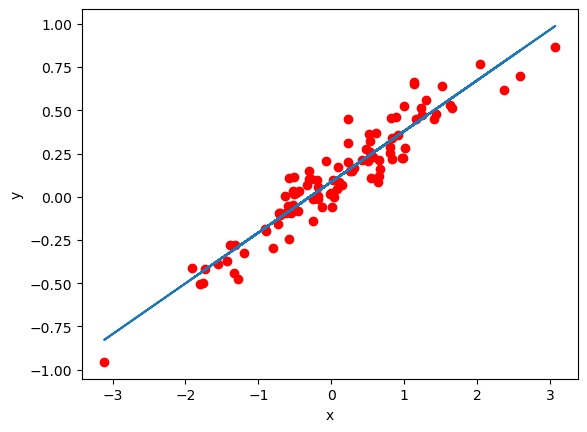

In [17]:
# check data and model
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, (t1.detach().numpy()*x + t0.detach().numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

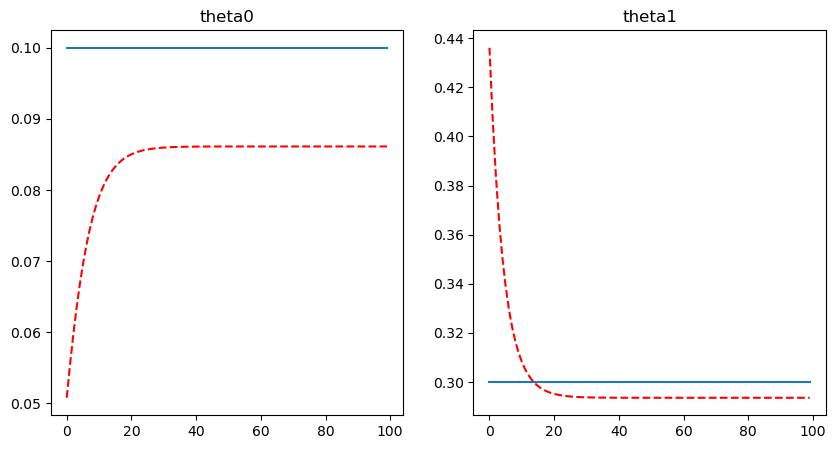

In [18]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Let's compare the results with the linear algebra

In [19]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient

t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)

# theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()]))

step_size = 0.001
optimizer = torch.optim.SGD([t1, t0], lr=step_size)

# Gradient Descent
n_iter = 100
theta_history = []
for t in range(0, n_iter):
    # Calculate loss
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    
    # Calculate gradient
    loss.backward()
    
    ##################################################################
    # Investigate the manual gradient descent step
    # Code within this block (###) is just for the investigation, not required for the optimizer
    # Gradient using torch
    theta0_grad = t0.grad
    theta1_grad = t1.grad
    t0_manual1 = t0.item() - step_size * theta0_grad
    t1_manual1 = t1.item() - step_size * theta1_grad
    
    # Gradient using math
    theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()])).T
    df = 2 * (A.T * A * theta_math - A.T * y)
    theta_math = theta_math - step_size * df
    t0_manual2 = theta_math[0,0]
    t1_manual2 = theta_math[1,0]
    ##################################################################
    
    # This is how the optimizer actually works (theta0 and 1 are updated)
    optimizer.step()
    optimizer.zero_grad()
    
    # Save Log
    theta_history.append([t0.item(), t1.item()])
    if (t%10==0):
        print('iter= {},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},'\
              .format(t,t0.item(), t0_manual1.item(),t0_manual2, t1.item(), t1_manual1.item(),t1_manual2))
theta_history = np.array(theta_history)
opt = loss.item()

iter= 0,	 t0 (manual 1, 2, optim): -0.799424, -0.799424, -0.799424,	 t0 (manual 1, 2, optim): -0.332518, -0.332518, -0.332518,
iter= 10,	 t0 (manual 1, 2, optim): 0.003032, 0.003032, 0.003032,	 t0 (manual 1, 2, optim): 0.252438, 0.252438, 0.252438,
iter= 20,	 t0 (manual 1, 2, optim): 0.077936, 0.077936, 0.077936,	 t0 (manual 1, 2, optim): 0.291421, 0.291421, 0.291421,
iter= 30,	 t0 (manual 1, 2, optim): 0.085276, 0.085276, 0.085276,	 t0 (manual 1, 2, optim): 0.293541, 0.293541, 0.293541,
iter= 40,	 t0 (manual 1, 2, optim): 0.086034, 0.086034, 0.086034,	 t0 (manual 1, 2, optim): 0.293584, 0.293584, 0.293584,
iter= 50,	 t0 (manual 1, 2, optim): 0.086116, 0.086116, 0.086116,	 t0 (manual 1, 2, optim): 0.293571, 0.293571, 0.293571,


iter= 60,	 t0 (manual 1, 2, optim): 0.086125, 0.086125, 0.086125,	 t0 (manual 1, 2, optim): 0.293568, 0.293568, 0.293568,
iter= 70,	 t0 (manual 1, 2, optim): 0.086126, 0.086126, 0.086126,	 t0 (manual 1, 2, optim): 0.293567, 0.293567, 0.293567,
iter= 80,	 t0 (manual 1, 2, optim): 0.086126, 0.086126, 0.086126,	 t0 (manual 1, 2, optim): 0.293567, 0.293567, 0.293567,
iter= 90,	 t0 (manual 1, 2, optim): 0.086126, 0.086126, 0.086126,	 t0 (manual 1, 2, optim): 0.293567, 0.293567, 0.293567,


## Solve using Scikit-Learn

[[0.29356732]]
[0.08612609]


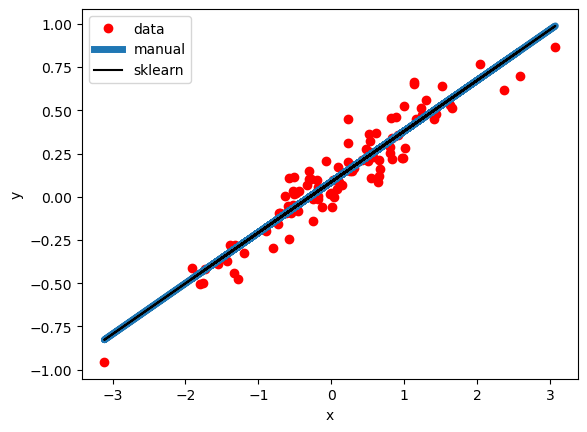

In [20]:
from sklearn import linear_model # type: ignore
reg = linear_model.LinearRegression()
reg.fit(x, y)
print(reg.coef_)
print(reg.intercept_)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, reg.coef_*x + reg.intercept_, linewidth=5)
plt.plot(x, reg.predict(x), 'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data', 'manual', 'sklearn'])
plt.show()

# Linear Regression with Outliers

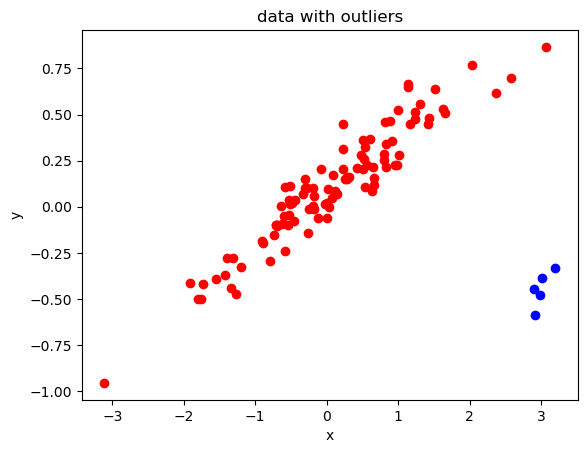

In [21]:
x_out = np.random.normal(3, 0.1, 5)
y_out = np.random.normal(-0.5, 0.1, 5)

x_outlier = np.vstack([x, x_out.reshape(-1,1)])
y_outlier = np.vstack([y, y_out.reshape(-1,1)])

# x_outlier = np.vstack([x, np.array([1, 2]).reshape(-1,1)])
# y_outlier = np.vstack([y, np.array([-0.8, -0.8]).reshape(-1,1)])
A_outlier = np.hstack([x_outlier**0, x_outlier])
A_outlier = np.asmatrix(A_outlier)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_out, y_out, 'bo')
plt.title('data with outliers')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

### L2 Norm

In [22]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

def func_loss(t0, t1):
    loss = ((y_outlier_tensor - (t1*x_outlier_tensor + t0))**2).sum()
    return loss

theta_history, t0, t1 = find_theta(func_loss, n_iter, step_size)


iter= 0,	 theta0: -0.993007,	 theta1: -0.026506, 	 loss: 238.041990
iter= 10,	 theta0: -0.054708,	 theta1: 0.189519, 	 loss: 9.638333
iter= 20,	 theta0: 0.037194,	 theta1: 0.163022, 	 loss: 7.924980
iter= 30,	 theta0: 0.047945,	 theta1: 0.158669, 	 loss: 7.900144
iter= 40,	 theta0: 0.049249,	 theta1: 0.158114, 	 loss: 7.899773
iter= 50,	 theta0: 0.049408,	 theta1: 0.158046, 	 loss: 7.899768
iter= 60,	 theta0: 0.049428,	 theta1: 0.158037, 	 loss: 7.899767
iter= 70,	 theta0: 0.049430,	 theta1: 0.158036, 	 loss: 7.899767
iter= 80,	 theta0: 0.049430,	 theta1: 0.158036, 	 loss: 7.899767
iter= 90,	 theta0: 0.049431,	 theta1: 0.158036, 	 loss: 7.899767


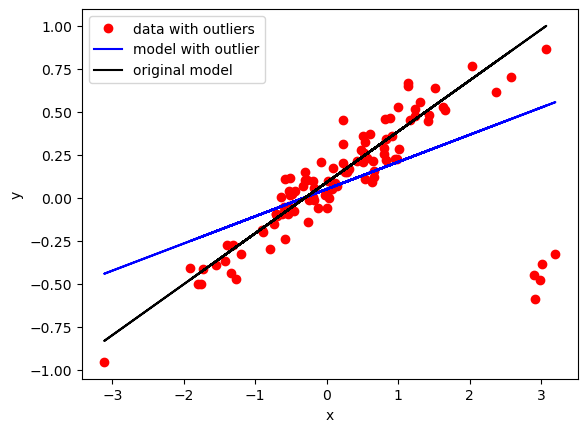

In [23]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

### L1 Norm

In [24]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

def func_loss(t0, t1):
    loss = abs((y_outlier_tensor - (t1*x_outlier_tensor + t0))).sum()
    return loss

theta_history, t0, t1 = find_theta(func_loss, n_iter, step_size)


iter= 0,	 theta0: -1.354434,	 theta1: -1.268204, 	 loss: 220.219215
iter= 10,	 theta0: -0.596434,	 theta1: -0.589680, 	 loss: 116.458903
iter= 20,	 theta0: 0.009566,	 theta1: 0.083488, 	 loss: 27.703532
iter= 30,	 theta0: 0.073566,	 theta1: 0.262145, 	 loss: 14.711294
iter= 40,	 theta0: 0.075566,	 theta1: 0.263124, 	 loss: 14.710743
iter= 50,	 theta0: 0.075566,	 theta1: 0.263117, 	 loss: 14.711048
iter= 60,	 theta0: 0.075566,	 theta1: 0.263111, 	 loss: 14.711045
iter= 70,	 theta0: 0.075566,	 theta1: 0.263104, 	 loss: 14.711043
iter= 80,	 theta0: 0.075566,	 theta1: 0.263098, 	 loss: 14.711040
iter= 90,	 theta0: 0.075566,	 theta1: 0.263091, 	 loss: 14.711038


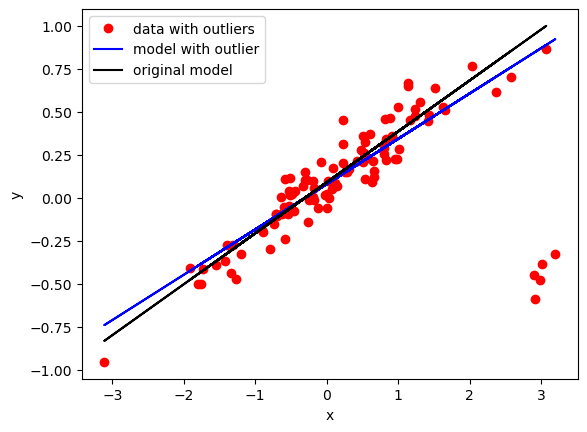

In [25]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

# Correlation Analysis
- .corr() for pandas (default: pearson, method=)
- scipy.stats  library can!
reference: https://datadoctorblog.com/2023/08/08/Py-Stat-correlation-analysis/

In [26]:
s = 'https://raw.githubusercontent.com/jongmoonha/AI-ME-Practice/refs/heads/main/data/iris_missing.csv'
df_iris = pd.read_csv(s)

print(df_iris)
df_iris.describe()

df_iris_notna = df_iris.notna()
df_iris_notna_rows = df_iris_notna.all(axis=1)
df_iris_notna = df_iris.loc[df_iris_notna_rows]
df_iris_notna_num = df_iris_notna[df_iris.columns[0:-1]]

df_iris_notna_num.corr()

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          NaN           NaN          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           NaN          2.5           NaN          NaN  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          NaN  virginica

[150 rows x 5 columns]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.071370,0.860217,0.808743
Sepal.Width,-0.071370,1.000000,-0.406533,-0.338672
Petal.Length,0.860217,-0.406533,1.000000,0.961360
Petal.Width,0.808743,-0.338672,0.961360,1.000000


In [27]:
df_iris_notna_num.corr(method = "spearman")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.113584,0.873034,0.823997
Sepal.Width,-0.113584,1.000000,-0.272651,-0.259357
Petal.Length,0.873034,-0.272651,1.000000,0.940600
Petal.Width,0.823997,-0.259357,0.940600,1.000000


In [28]:
from scipy.stats import pearsonr, spearmanr, kendalltau
print(pearsonr(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))
print(spearmanr(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))
print(kendalltau(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))

PearsonRResult(statistic=0.8602174805176664, pvalue=4.4624219928665967e-38)
SignificanceResult(statistic=0.8730341892821037, pvalue=1.7324794500960063e-40)
SignificanceResult(statistic=0.7064455853595843, pvalue=4.351505558359676e-30)
